# Carpyncho RR-Lyrae V.1.0 Catalogs(`cp_rr_v1`)

This notebook give some insights about the data stored in all the `features` types catalogs.

In [1]:
# import the module and instance the client
import carpyncho 
client = carpyncho.Carpyncho(index_url="/home/juan/proyectos/carpyncho-py/src/data/local_index.json")

Now we download te Carpyncho RR-Lyrae V1 Catalog

In [2]:
df = client.get_catalog("others", "cpy_rr_v1")
df

,id,tile,cnt,ra_k,dec_k,prob,tsample
6799063,33960000211620,b396,131,267.549917,-18.699892,0.852000,"b206, b214, b216, b220, b228, b234, b247, b248..."
7153972,33960000942530,b396,130,268.118017,-17.763556,0.849467,"b206, b214, b216, b220, b228, b234, b247, b248..."
6971905,33960000566886,b396,131,267.536346,-18.093889,0.837733,"b206, b214, b216, b220, b228, b234, b247, b248..."
6801853,33960000220135,b396,131,267.637892,-18.734767,0.837333,"b206, b214, b216, b220, b228, b234, b247, b248..."
6747151,33960000105195,b396,131,267.487762,-18.848939,0.828400,"b206, b214, b216, b220, b228, b234, b247, b248..."
...,...,...,...,...,...,...,...
6457949,33600000787886,b360,139,263.635417,-29.303825,0.462667,"b206, b214, b216, b220, b228, b234, b247, b248..."
6926060,33960000470380,b396,131,267.525504,-18.250553,0.462000,"b206, b214, b216, b220, b228, b234, b247, b248..."
6874859,33960000359818,b396,131,267.490592,-18.416206,0.460933,"b206, b214, b216, b220, b228, b234, b247, b248..."
682776,32200000656825,b220,123,274.725521,-34.229878,0.460933,"b206, b214, b216, b228, b234, b247, b248, b261..."


The columns of this catalog are

In [3]:
print(list(df.columns))

['id', 'tile', 'cnt', 'ra_k', 'dec_k', 'prob', 'tsample']


Where

- **id** (ID): This is the unique identifier of every light curve. If you want to access all the points of the lightcurve of a source wiht any *id*, you can search for the same value of a `bm_src_id`in the `lc`, or `id` in the `features` catalog of the same tile indicated in the column `tile`.
- **tile**: The name of the tile where the candidate is located.
- **cnt** (Count): How many epochs has the lightcurve.
- **ra_k**: Right Ascension in band $K_s$ of the source in the first epoch.
- **dec_k**: Declination in band $K_s$ of the source in the first epoch.
- **prob** (Probability): The probability of this source to be a RR-Lyrae star [1]. 
- **tsample** (Tiles-Sample): Which tiles was used to create the ensemble select this source as a candidate [1].

[1] To more insights about this feature please chek our work

> Not ready

Well lets play with a candidate

In [4]:
rr = df.iloc[0]
rr

id                                            33960000211620
tile                                                    b396
cnt                                                      131
ra_k                                                  267.55
dec_k                                               -18.6999
prob                                                   0.852
tsample    b206, b214, b216, b220, b228, b234, b247, b248...
Name: 6799063, dtype: object

We can check their mean of magnitudes to check if the source is not saturated or diffuse.

Now we know id from the tile b396 we can retrieve the entire collection of features and the light-curve

In [5]:
feats = client.get_catalog("b396", "features")
lc = client.get_catalog("b396", "lc")

# retrieve the features of the selected source
feats = feats[feats.id == rr.id]  
lc = lc[lc.bm_src_id == rr.id]

No we have the features


In [6]:
feats

,id,cnt,ra_k,dec_k,vs_type,vs_catalog,Amplitude,Autocor_length,Beyond1Std,Con,...,c89_jk_color,c89_m2,c89_m4,n09_c3,n09_hk_color,n09_jh_color,n09_jk_color,n09_m2,n09_m4,ppmb
144267,33960000211620,131,267.549917,-18.699892,,,0.178,2.0,0.274809,0.0,...,0.139307,13.758278,13.748731,0.039034,0.037559,0.103765,0.141323,13.8797,13.880858,1.49232


and the entire lc

In [7]:
lc

,bm_src_id,pwp_id,pwp_stack_src_id,pwp_stack_src_hjd,pwp_stack_src_mag3,pwp_stack_src_mag_err3
752483,33960000211620,2753,3000275300031172,56152.044089,14.230,0.028
926175,33960000211620,2754,3000275400026402,56152.044623,14.198,0.030
1745826,33960000211620,2759,3000275900028136,56156.014732,14.282,0.030
1922566,33960000211620,2760,3000276000029792,56156.015266,14.342,0.032
2959474,33960000211620,2765,3000276500036874,56167.994914,14.304,0.029
...,...,...,...,...,...,...
82226182,33960000211620,2711,3000271100035211,56075.305061,14.265,0.031
82456417,33960000211620,2712,3000271200042427,56075.305558,14.242,0.027
83636862,33960000211620,2717,3000271700036927,56078.297314,14.206,0.029
83884497,33960000211620,2718,3000271800042962,56078.297828,14.205,0.026


We can phase the light curve now

For make our code simple we can use to folde the light curve the [PyAstronomy](https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/index.html) and numpy library 

In [8]:
from PyAstronomy.pyasl import foldAt
import numpy as np

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt

now we can plot the folded and unfolded lightcurves

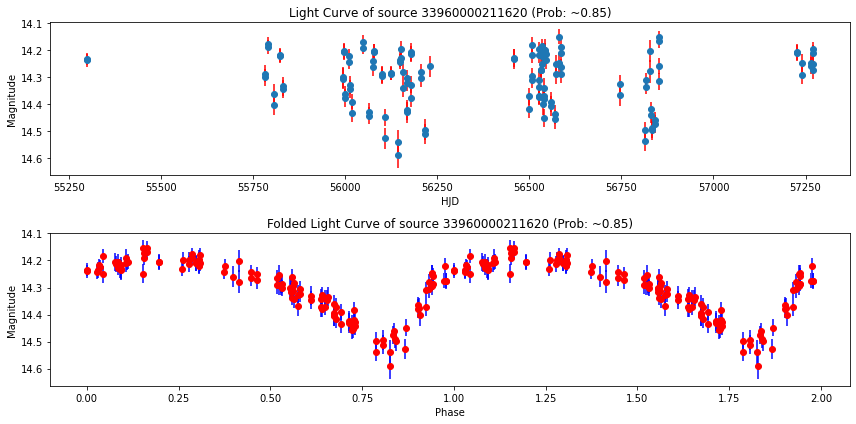

In [10]:
lc = lc.sort_values("pwp_stack_src_hjd")

time, mag, err = (
        lc.pwp_stack_src_hjd.values,
        lc.pwp_stack_src_mag3.values,
        lc.pwp_stack_src_mag_err3.values)

t0 = time[0]

phases = foldAt(time, feats.PeriodLS.values, T0=t0)
sort = np.argsort(phases)
phases, pmag, perr = phases[sort], mag[sort], err[sort]

phases = np.hstack((phases, phases + 1))
pmag = np.hstack((pmag, pmag))
perr = np.hstack((perr, perr))


fig, axes = plt.subplots(2, 1, figsize=(12, 6))

ax = axes[0]
ax.errorbar(time, mag, err, ls="", marker="o", ecolor="red")
ax.set_title(f"Light Curve of source {rr.id} (Prob: ~{rr.prob:.2f})")
ax.set_ylabel("Magnitude")
ax.set_xlabel("HJD")
ax.invert_yaxis()

ax = axes[1]
ax.errorbar(phases, pmag, perr, ls="", marker="o", ecolor="blue", color="red")
ax.set_title(f"Folded Light Curve of source {rr.id} (Prob: ~{rr.prob:.2f})")
ax.set_ylabel("Magnitude")
ax.set_xlabel("Phase")
ax.invert_yaxis()

fig.tight_layout()

In [11]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2020, 4, 28, 14, 51, 19, 200081)